KNN: 
trained labelled data 
given a new sample point, calculate the Eucledean distance to all points, and select the Kth number of nearest neighbour, use the majority class to clasify the point.

in multi-dimension space, the Euclidean distance is calculated as:
d(x, y): = sqrt [(x1-y1)^2 + (x2-y2)^2 + ... + (Xn - Yn)^2 ] = sqrt(sigma (Xi - yi)^2))

Usually 1, 3, 5, 7 k
to avoid having ties in the counts

Describe the process of KNN training using Sklean
1. instantiate a classifier model object
2. fit the classifier model with the training data and label
3. use the trained model to predict the label of the test data

In [1]:
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!pwd

/content


In [8]:
# www.kaggle.com/c/Kannada-MNIST
train = pd.read_csv('gdrive/MyDrive/Colab Notebooks/KNN_and_CNN/Kannada-MNIST/train.csv')
test = pd.read_csv('gdrive/MyDrive/Colab Notebooks/KNN_and_CNN/Kannada-MNIST/test.csv')

In [9]:
#观察数据 - data stored as row vector format. each row represent an image
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#分离训练数据和标签
train_set = train.drop('label', axis = 1)
train_label = train.label

In [12]:
test.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#测试数据预处理
test_set = test.drop('id',axis = 1)
#convert to np array
test_set = test_set.iloc[0:500].values
test_set.shape

(500, 784)

In [13]:
#观察数据尺寸
train_set.shape

(60000, 784)

In [21]:
#取出一定量的数据作为训练集
train_image = train_set.iloc[0:1000].values   #此处设定为500个以加快计算速度，可以自行设定成不高于60000的值
train_labels = train_label.iloc[0:1000].values

In [22]:
#调用sklearn中的KNN分类器
classifier = KNeighborsClassifier(n_neighbors = 3)

In [23]:
#将数据应用到分类器中
classifier.fit(train_image, train_labels)

KNeighborsClassifier(n_neighbors=3)

In [24]:
#用设定好的KNN分类器预测数据
prediction = classifier.predict(test_set)
prediction

array([3, 0, 2, 6, 7, 6, 1, 8, 5, 4, 8, 1, 3, 4, 8, 1, 5, 1, 5, 9, 3, 7,
       6, 0, 2, 0, 8, 6, 0, 0, 0, 9, 3, 3, 0, 4, 6, 0, 7, 1, 7, 9, 3, 4,
       5, 4, 7, 8, 7, 4, 3, 1, 3, 4, 4, 7, 1, 1, 3, 4, 2, 1, 3, 6, 1, 9,
       1, 4, 9, 0, 4, 3, 7, 1, 3, 3, 1, 6, 1, 0, 7, 3, 4, 4, 3, 6, 3, 2,
       2, 3, 2, 1, 4, 4, 6, 9, 7, 3, 7, 3, 4, 2, 7, 4, 3, 3, 3, 3, 3, 9,
       6, 3, 3, 6, 3, 2, 0, 3, 0, 7, 4, 1, 3, 4, 5, 2, 1, 2, 6, 0, 3, 9,
       1, 5, 9, 3, 8, 1, 6, 5, 1, 9, 3, 0, 8, 3, 8, 3, 5, 0, 0, 6, 6, 0,
       8, 1, 7, 8, 2, 5, 1, 8, 1, 0, 3, 1, 2, 6, 2, 2, 8, 9, 9, 3, 2, 5,
       7, 4, 1, 3, 1, 2, 0, 6, 3, 0, 7, 8, 1, 4, 4, 2, 3, 6, 0, 2, 6, 5,
       9, 1, 9, 1, 3, 4, 4, 3, 4, 3, 0, 3, 1, 4, 1, 6, 2, 3, 0, 9, 1, 0,
       5, 7, 4, 3, 2, 1, 2, 0, 1, 0, 3, 3, 3, 2, 0, 2, 6, 3, 4, 2, 4, 9,
       9, 8, 5, 2, 2, 7, 3, 5, 3, 3, 0, 3, 6, 2, 0, 3, 4, 4, 1, 4, 1, 4,
       8, 6, 1, 3, 2, 6, 6, 2, 4, 9, 4, 9, 3, 1, 3, 1, 5, 0, 9, 3, 4, 5,
       3, 4, 0, 9, 7, 1, 3, 7, 2, 7, 4, 1, 8, 1, 8,

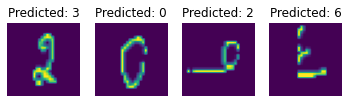

In [25]:
#可视化部分结果
plt.figure()
for i in range(4):
    plt.subplot(1, 4, i+1)
    #reshape the 784 pixel values back to 2d
    img = test_set[i].reshape(28,28)
    plt.imshow(img)
    plt.title('Predicted: ' + str(prediction[i]))
    plt.axis('off')
plt.show()

In [ ]:
# using np array is easier to change the value
# dataframe hard to change the values or calculation